# Práctica regresión logística

## Imports

In [7]:
import numpy as np #numpy
import matplotlib.pyplot as plt #ploteo
from sklearn.datasets import make_classification #dataset de scikit pirque kaggle me demora mucho buscar :(
                                                 # con esta literalmente podemos generar un dataset para una
                                                 # tarea de clasificación
import seaborn as sns #más ploteo

## Funciones

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    return (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)
def predict(X, params):
    return np.round(sigmoid(X @ params))


## Conjunto de datos

[[ 9.43624594e-01 -6.79782992e-01]
 [-8.68018214e-01 -2.53921797e-01]
 [-1.76747111e+00 -9.99923690e-01]
 [ 5.72275908e-01  3.94578577e-01]
 [-1.43602637e+00 -1.30764497e+00]
 [-1.06475862e+00  1.11871846e+00]
 [ 9.72359074e-01 -1.52979682e-01]
 [-1.51469537e+00 -2.73244894e+00]
 [ 2.13551898e+00  1.31799260e+00]
 [-2.38046447e-01  7.76711032e-01]
 [-6.20565755e-01 -1.49496599e+00]
 [-3.35735651e+00  2.02011582e+00]
 [ 1.54425541e+00  1.62618208e+00]
 [-9.63019035e-01  9.03594979e-01]
 [-1.22739125e+00 -8.47962622e-01]
 [ 9.84997115e-01 -1.51851850e+00]
 [-1.95059468e+00 -1.58700893e+00]
 [-1.44608188e+00  1.27387427e+00]
 [ 9.28373735e-01  1.34995971e+00]
 [-1.61301801e+00  4.75377383e-01]
 [ 9.88781920e-01  1.16014678e+00]
 [ 1.07645604e+00  1.58541911e+00]
 [ 1.67668529e+00  5.97739833e-01]
 [ 1.89506025e+00 -3.12413714e-01]
 [ 1.04265420e+00 -1.29555621e-01]
 [ 1.47690419e+00 -1.17539302e+00]
 [ 1.22696237e+00 -1.35943895e+00]
 [ 3.71268747e-01 -1.22988499e+00]
 [ 9.36983452e-01 -4

/Users/rafxar/topicosIA/topicos/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

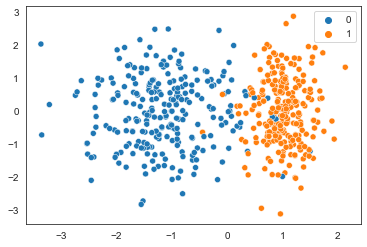

In [9]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
# aquí literalmente generamos un conjunto de datos con 500 muestras
y = y[:,np.newaxis]
print(X)
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))

Initial Cost is: [[0.69312718]] 

Parametros finales: 
 [[-0.45293068]
 [ 3.26552327]
 [ 0.03334871]] 



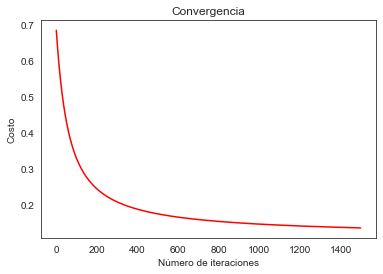

In [10]:

m = len(y)

X = np.hstack((np.ones((m,1)),X))
n = np.size(X,1)
parametros_iniciales = np.zeros((n,1))

iteraciones = 1500
tasa_de_aprendizaje = 0.03

costo_inicial = compute_cost(X, y, parametros_iniciales)

print("Initial Cost is: {} \n".format(costo_inicial))

(historial_de_costos, params_optimos) = gradient_descent(X, y, parametros_iniciales, tasa_de_aprendizaje, iteraciones)

print("Parametros finales: \n", params_optimos, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(historial_de_costos)), historial_de_costos, 'r')
plt.title("Convergencia")
plt.xlabel("Número de iteraciones")
plt.ylabel("Costo")
plt.show()

## Cálculo de precisión

In [12]:
y_pred = predict(X, params_optimos)
score = float(sum(y_pred == y))/ float(len(y))

print(f'El score es: {score}')

El score es: 0.966


## Comparación con Sklearn

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sk_logistic = LogisticRegression()
sk_logistic.fit(x_train, y_train)
score = sk_logistic.score(x_test, y_test)
print(f'El score es: {score}')

El score es: 0.9733333333333334


/Users/rafxar/topicosIA/topicos/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Conclusión

En conclusión el modelo de Sklearn obtiene mejores resultados muy probablemente por el hecho de que es una implementación más completa.